<a href="https://colab.research.google.com/github/atulpatil2228/Pw_ML_learning/blob/main/11_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=10000,centers=3,n_features=2,random_state=1)

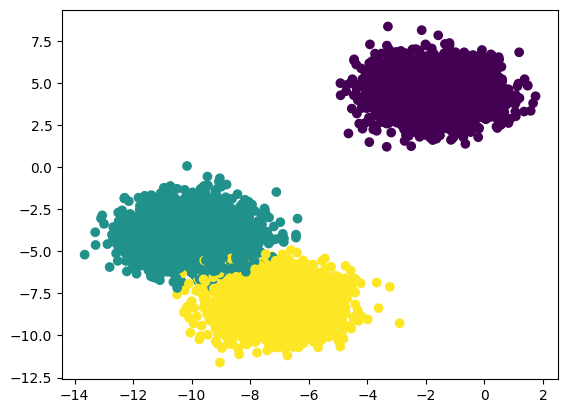

In [12]:
 plt.scatter(X[:,0], X[:, 1], c=y)

In [13]:
X

array([[ -3.08389358,   5.70067218],
       [ -8.80258525,  -5.07389013],
       [-10.02267995,  -3.13472699],
       ...,
       [ -5.7188547 ,  -9.78793618],
       [ -1.41968841,   3.76555241],
       [ -6.97492028,  -7.62544658]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [15]:
X_train.shape, X_test.shape

((7000, 2), (3000, 2))

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans


KMeans(n_clusters=3)

In [34]:
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [35]:
y_labels = kmeans.predict(X_train)

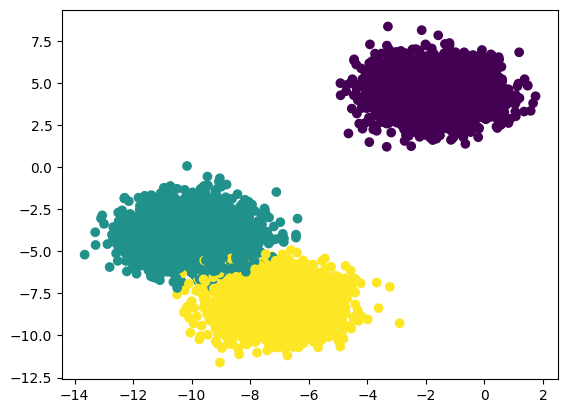

In [36]:
 plt.scatter(X[:,0], X[:, 1], c=y)

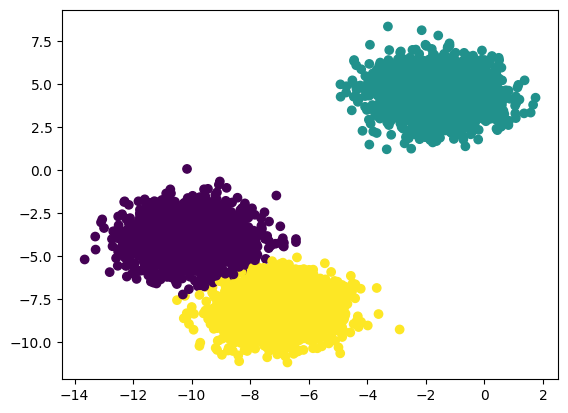

In [37]:
 plt.scatter(X_train[:,0], X_train[:, 1], c=y_labels)## on Traindata

In [38]:
## How better this clustering model is
from sklearn.metrics import silhouette_score
silhouette_score(X_train,kmeans.labels_)## close to 1 we have better model


np.float64(0.7182728922426279)

In [39]:
kmeans.labels_

array([0, 1, 2, ..., 0, 1, 2], dtype=int32)

In [40]:
kmeans.inertia_## K= 3 , this wcss distance

14116.14000823993

In [42]:
## how to select K(centroid ) >> elbow method
wcss= []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)


In [43]:
wcss## it is decreasing

[288485.93404477334,
 44710.01097738703,
 14116.134381704484,
 12559.310906127219,
 10923.092451479699,
 9391.807251460848,
 8445.452982326402,
 7350.594033120301,
 6941.016124621277]

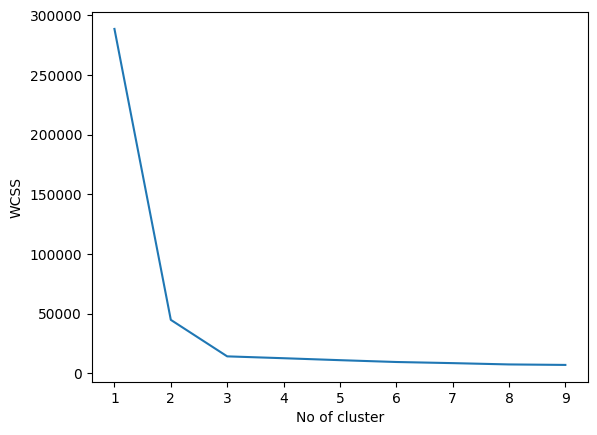

In [45]:
## plot elbow curve
plt.plot(range(1,10),wcss)
plt.xticks(range(1,10))
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.show()

In [46]:
## Based on the plot above the optimal no of k/centroid  shpuld be 3

In [47]:
!pip install kneed

In [48]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,10),wcss,curve = 'convex',direction ='decreasing')
k1.elbow

np.int64(2)

In [49]:
silhouette_coeff = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhouette_coeff.append(score)



In [50]:
silhouette_coeff

[np.float64(0.7668200416390646),
 np.float64(0.7182728922426279),
 np.float64(0.5828630971458942),
 np.float64(0.4896804352651339),
 np.float64(0.3953394943647589),
 np.float64(0.3213868004371213),
 np.float64(0.327004972492736),
 np.float64(0.3273248505278275)]